In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.dummy import DummyRegressor

In [71]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("tab10")

In [72]:
fichiers_et_variables = [
    ('gdp_growth_rate.csv', 'gdp_growth_rate'),
    ('unemployment_rate.csv', 'unemployment_rate'),
    ('inflation_rate.csv', 'inflation_rate'),
    ('gdp_per_capita.csv', 'gdp_per_capita'),
    ('population.csv', 'population'),
    ('fdi_pct_gdp.csv', 'fdi_pct_gdp'),
    ('remittances_pct_gdp.csv', 'remittances_pct_gdp'),
    ('internet_users_pct.csv', 'internet_users_pct'),
]

dataframes_transformes = {}
for fichier, var in fichiers_et_variables:
    df = pd.read_csv(fichier, skiprows=4)
    df_long = df.melt(id_vars=df.columns[:4], value_vars=df.columns[4:], var_name='Year', value_name=var)
    df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
    df_long = df_long[df_long['Country Name'] == 'France'][['Year', var]]
    dataframes_transformes[var] = df_long

In [73]:
df_economic = dataframes_transformes[list(dataframes_transformes.keys())[0]].copy()
for var in list(dataframes_transformes.keys())[1:]:
    df_economic = pd.merge(df_economic, dataframes_transformes[var], on='Year', how='outer')

In [74]:
df_gdp = pd.read_csv("https://raw.githubusercontent.com/datasets/gdp/master/data/gdp.csv")
france_gdp = df_gdp[df_gdp["Country Name"] == "France"][['Year', 'Value']]


In [75]:
merged_df = pd.merge(france_gdp, df_economic, on='Year', how='left')
merged_df = merged_df.dropna(subset=['Value']).sort_values('Year').reset_index(drop=True)

In [76]:
merged_df.head()

,Year,Value,gdp_growth_rate,unemployment_rate,inflation_rate,gdp_per_capita,population,fdi_pct_gdp,remittances_pct_gdp,internet_users_pct
0,1960,6.222548e+10,NaN,NaN,4.139936,1302.531497,47412964.0,NaN,NaN,NaN
1,1961,6.746164e+10,4.803832,NaN,2.400461,1394.535571,47905982.0,NaN,NaN,NaN
2,1962,7.560753e+10,6.871699,NaN,5.331280,1547.620259,48389516.0,NaN,NaN,NaN
3,1963,8.475920e+10,6.198635,NaN,4.999153,1717.703791,48877567.0,NaN,NaN,NaN
4,1964,9.400785e+10,6.425865,NaN,3.211192,1884.137914,49401492.0,NaN,NaN,NaN


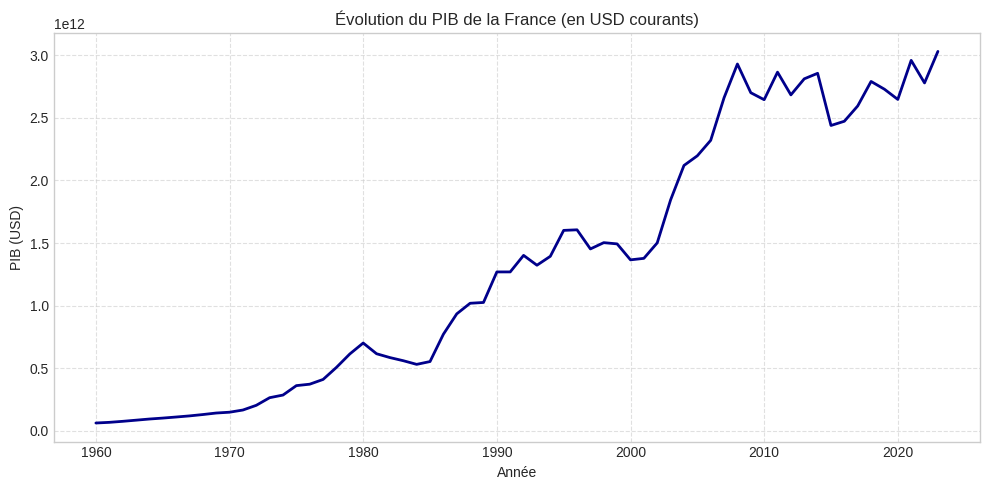

In [78]:
plt.figure(figsize=(10, 5))
plt.plot(merged_df['Year'], merged_df['Value'], color='darkblue', linewidth=2)
plt.title('Évolution du PIB de la France (en USD courants)')
plt.xlabel('Année')
plt.ylabel('PIB (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [77]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 64 non-null     int64  
 1   Value                64 non-null     float64
 2   gdp_growth_rate      63 non-null     float64
 3   unemployment_rate    33 non-null     float64
 4   inflation_rate       64 non-null     float64
 5   gdp_per_capita       64 non-null     float64
 6   population           64 non-null     float64
 7   fdi_pct_gdp          54 non-null     float64
 8   remittances_pct_gdp  49 non-null     float64
 9   internet_users_pct   34 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 5.1 KB


In [79]:
merged_df.describe()

,Year,Value,gdp_growth_rate,unemployment_rate,inflation_rate,gdp_per_capita,population,fdi_pct_gdp,remittances_pct_gdp,internet_users_pct
count,64.000000,6.400000e+01,63.000000,33.000000,64.000000,64.000000,6.400000e+01,54.000000,49.000000,34.000000
mean,1991.500000,1.332031e+12,2.695813,9.617121,4.070238,21147.890008,5.868843e+07,1.426277,0.591129,47.600891
std,18.618987,1.026789e+12,2.442263,1.562312,3.630703,15231.067837,6.032213e+06,1.103021,0.322320,35.077482
min,1960.000000,6.222548e+10,-7.440646,7.308000,0.037514,1302.531497,4.741296e+07,0.176974,0.176008,0.052800
25%,1975.750000,3.694473e+11,1.329569,8.610000,1.670222,6747.638412,5.417500e+07,0.467807,0.285312,7.022500
50%,1991.500000,1.296046e+12,2.442513,9.228000,2.651408,21912.646262,5.870041e+07,1.195912,0.647999,56.480000
75%,2007.250000,2.447633e+12,4.427813,10.273000,5.347840,36782.878208,6.410645e+07,1.915143,0.799269,81.205625
max,2023.000000,3.030904e+12,7.113149,12.593000,13.649317,45464.818139,6.828749e+07,4.015856,1.202578,86.836400


In [81]:
merged_df.isna().sum()

,0
Year,0
Value,0
gdp_growth_rate,1
unemployment_rate,31
inflation_rate,0
gdp_per_capita,0
population,0
fdi_pct_gdp,10
remittances_pct_gdp,15
internet_users_pct,30


In [82]:
numeric_cols = ['gdp_growth_rate', 'unemployment_rate', 'inflation_rate',
                'gdp_per_capita', 'population', 'fdi_pct_gdp',
                'remittances_pct_gdp', 'internet_users_pct']

merged_df[numeric_cols] = merged_df[numeric_cols].interpolate(method='linear', axis=0)
merged_df[numeric_cols] = merged_df[numeric_cols].fillna(method='bfill').fillna(method='ffill')

In [83]:
merged_df.isna().sum()

,0
Year,0
Value,0
gdp_growth_rate,0
unemployment_rate,0
inflation_rate,0
gdp_per_capita,0
population,0
fdi_pct_gdp,0
remittances_pct_gdp,0
internet_users_pct,0


In [84]:
merged_df.head()

,Year,Value,gdp_growth_rate,unemployment_rate,inflation_rate,gdp_per_capita,population,fdi_pct_gdp,remittances_pct_gdp,internet_users_pct
0,1960,6.222548e+10,4.803832,9.134,4.139936,1302.531497,47412964.0,0.422804,0.176008,0.0528
1,1961,6.746164e+10,4.803832,9.134,2.400461,1394.535571,47905982.0,0.422804,0.176008,0.0528
2,1962,7.560753e+10,6.871699,9.134,5.331280,1547.620259,48389516.0,0.422804,0.176008,0.0528
3,1963,8.475920e+10,6.198635,9.134,4.999153,1717.703791,48877567.0,0.422804,0.176008,0.0528
4,1964,9.400785e+10,6.425865,9.134,3.211192,1884.137914,49401492.0,0.422804,0.176008,0.0528


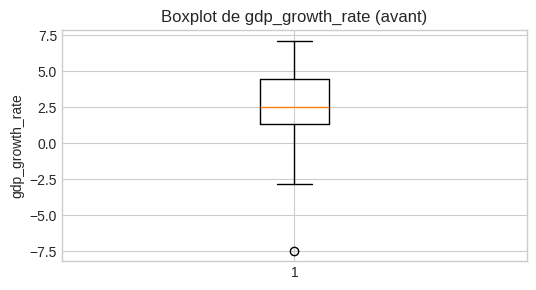

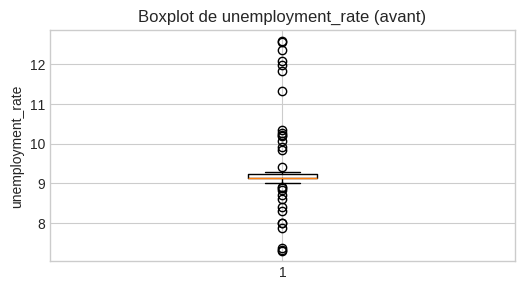

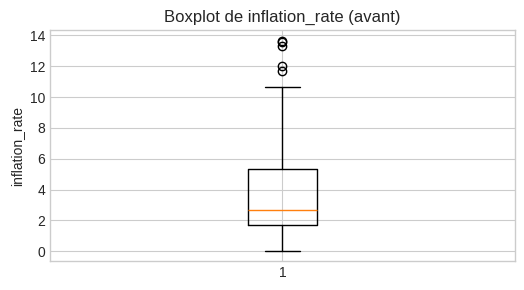

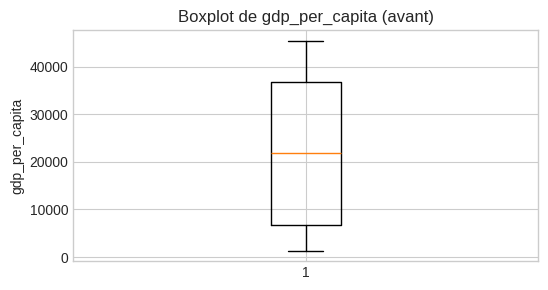

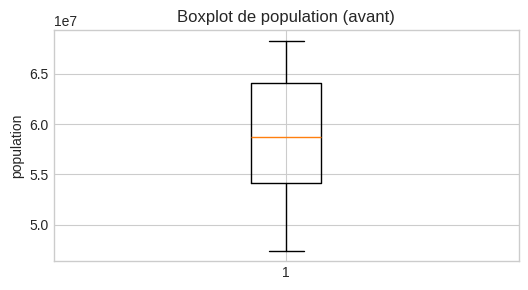

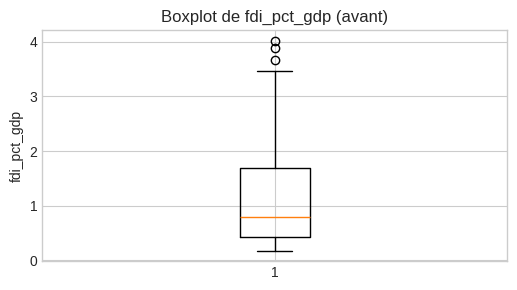

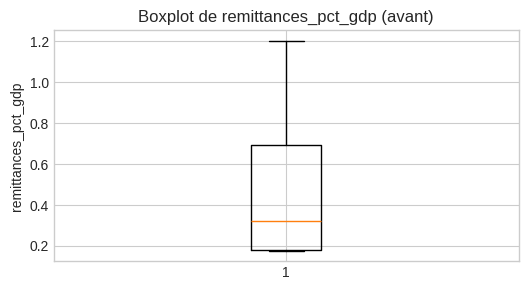

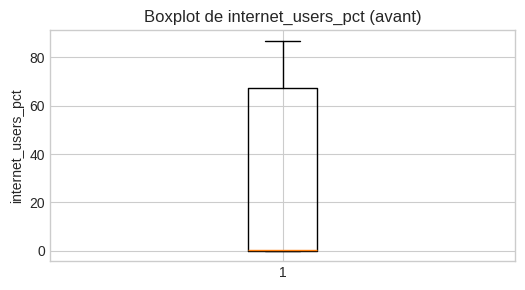

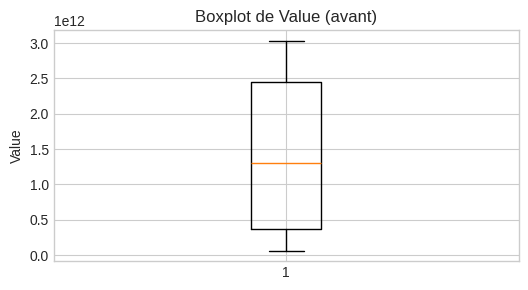

In [85]:
for col in features_all:
    if col in merged_df.columns:
        plt.figure(figsize=(6, 3))
        plt.boxplot(merged_df[col])
        plt.title(f"Boxplot de {col} (avant)")
        plt.ylabel(col)
        plt.show()

In [86]:
features_all = numeric_cols + ['Value']
for col in features_all:
    if col in merged_df.columns:
        Q1 = merged_df[col].quantile(0.25)
        Q3 = merged_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        merged_df[col] = merged_df[col].clip(lower=lower, upper=upper)

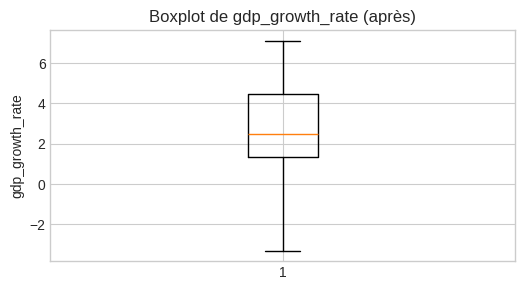

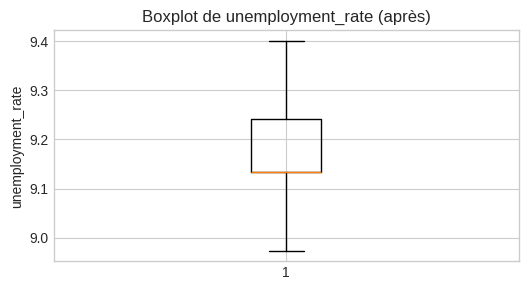

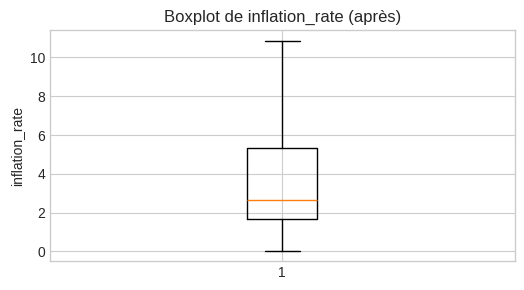

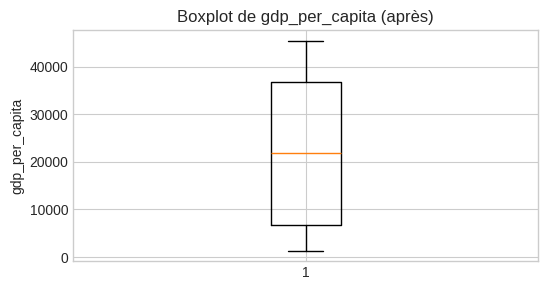

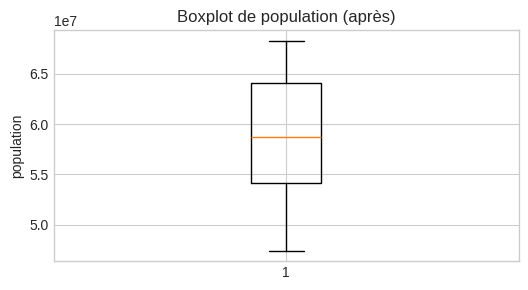

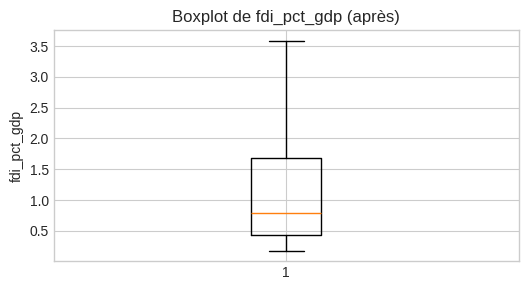

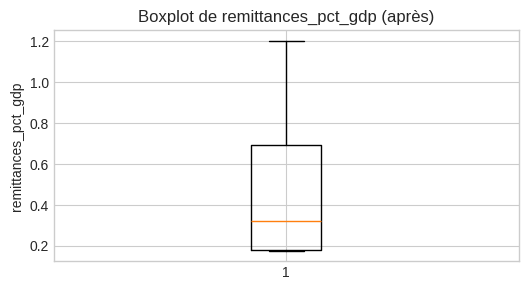

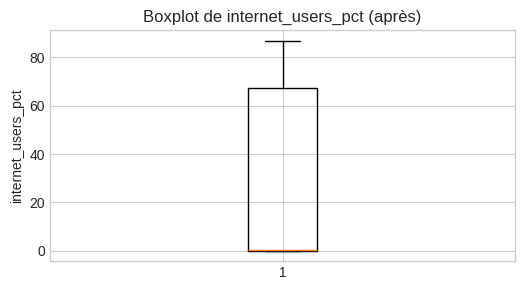

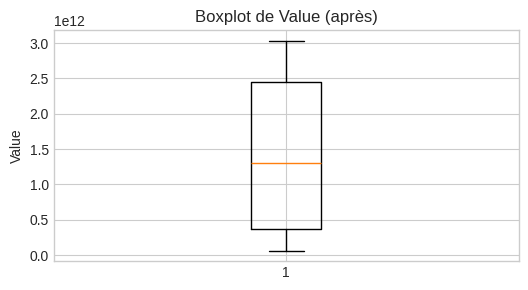

In [87]:
for col in features_all:
    if col in merged_df.columns:
        plt.figure(figsize=(6, 3))
        plt.boxplot(merged_df[col])
        plt.title(f"Boxplot de {col} (après)")
        plt.ylabel(col)
        plt.show()

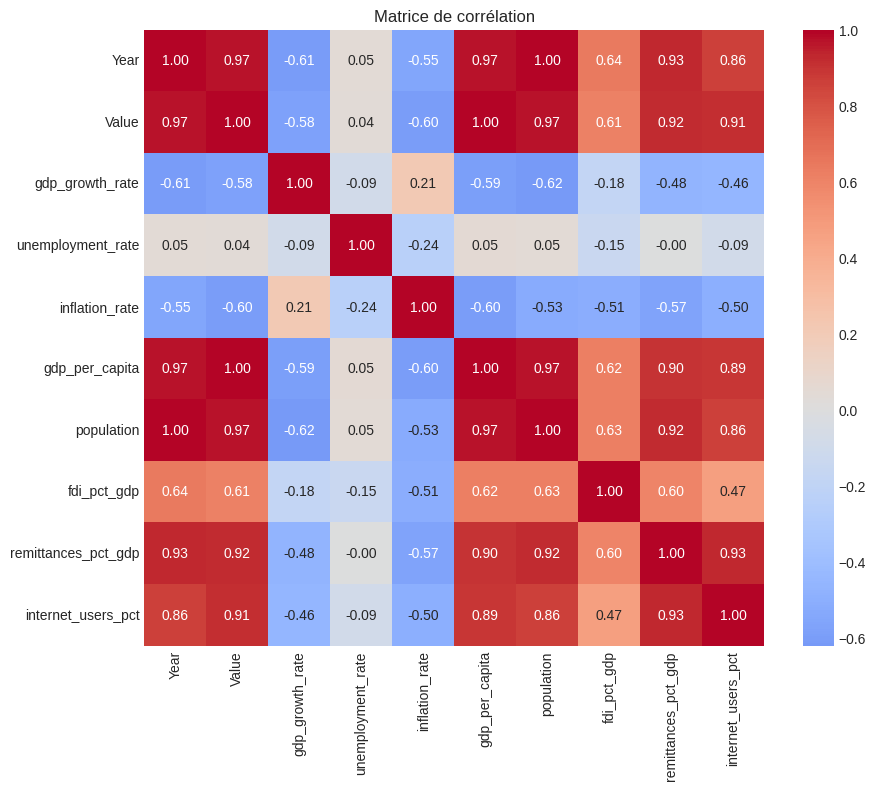

In [88]:
numeric_columns_for_corr = ['Year', 'Value'] + numeric_cols
correlation_matrix = merged_df[numeric_columns_for_corr].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()

In [89]:
split_idx = int(0.8 * len(merged_df))
train_df = merged_df.iloc[:split_idx]
test_df = merged_df.iloc[split_idx:]

X_train = train_df.drop(columns=['Value'])
y_train = train_df['Value']
X_test = test_df.drop(columns=['Value'])
y_test = test_df['Value']

print(f"→ Entraînement : {len(train_df)} ans ({train_df['Year'].min()}–{train_df['Year'].max()})")
print(f"→ Test         : {len(test_df)} ans ({test_df['Year'].min()}–{test_df['Year'].max()})")


→ Entraînement : 51 ans (1960–2010)
→ Test         : 13 ans (2011–2023)


In [90]:
BASE_YEAR = 1960
X_train_year = X_train[['Year']].copy()
X_test_year = X_test[['Year']].copy()
X_train_year_c = X_train_year - BASE_YEAR
X_test_year_c = X_test_year - BASE_YEAR

# --- Linéaire
model_lin = LinearRegression()
model_lin.fit(X_train_year, y_train)
y_pred_test_lin = model_lin.predict(X_test_year)
r2_lin = r2_score(y_test, y_pred_test_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_test_lin))

# --- Polynomial (degré 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_year_c)
X_test_poly = poly.transform(X_test_year_c)
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_test_poly = model_poly.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_test_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_test_poly))

# --- Exponentiel
y_train_log = np.log(y_train.clip(lower=1e-8))
model_exp = LinearRegression()
model_exp.fit(X_train_year_c, y_train_log)
y_pred_test_exp = np.exp(model_exp.predict(X_test_year_c))
r2_exp = r2_score(y_test, y_pred_test_exp)
rmse_exp = np.sqrt(mean_squared_error(y_test, y_pred_test_exp))

In [91]:
feature_cols = [col for col in X_train.columns if col != 'Year']
scaler = MinMaxScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[feature_cols] = scaler.fit_transform(X_train[feature_cols])
X_test_scaled[feature_cols] = scaler.transform(X_test[feature_cols])

X_train_final = X_train_scaled[feature_cols]
X_test_final = X_test_scaled[feature_cols]

rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train_final, y_train)
y_pred_rf = rf_model.predict(X_test_final)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

In [92]:
results = pd.DataFrame({
    "Modèle": ["Linéaire", "Polynomial", "Exponentiel", "Random Forest (Multi)"],
    "R² (test)": [r2_lin, r2_poly, r2_exp, r2_rf],
    "RMSE (test)": [rmse_lin, rmse_poly, rmse_exp, rmse_rf]
}).round(4)

print("\n=== COMPARAISON DES MODÈLES (SUR DONNÉES DE TEST) ===")
print(results.to_string(index=False))


=== COMPARAISON DES MODÈLES (SUR DONNÉES DE TEST) ===
               Modèle  R² (test)  RMSE (test)
             Linéaire    -1.0048 2.374652e+11
           Polynomial   -23.3607 8.277790e+11
          Exponentiel  -751.8957 4.601894e+12
Random Forest (Multi)    -1.4426 2.621186e+11


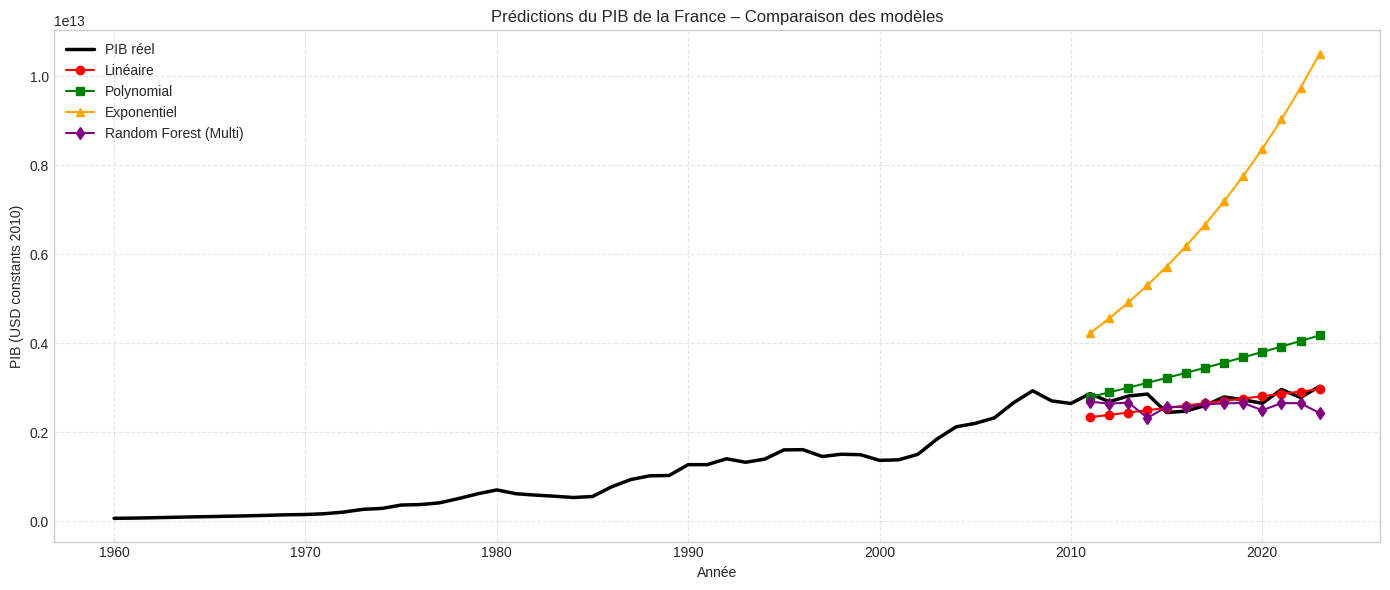

In [93]:
X_full = merged_df[['Year']]
X_full_c = X_full - BASE_YEAR
X_full_poly = poly.transform(X_full_c)

plt.figure(figsize=(14, 6))
plt.plot(merged_df['Year'], merged_df['Value'], 'k-', linewidth=2.5, label='PIB réel')
plt.plot(X_test['Year'], y_pred_test_lin, 'o-', color='red', label='Linéaire')
plt.plot(X_test['Year'], y_pred_test_poly, 's-', color='green', label='Polynomial')
plt.plot(X_test['Year'], y_pred_test_exp, '^-', color='orange', label='Exponentiel')
plt.plot(X_test['Year'], y_pred_rf, 'd-', color='purple', label='Random Forest (Multi)')
plt.xlabel("Année")
plt.ylabel("PIB (USD constants 2010)")
plt.title("Prédictions du PIB de la France – Comparaison des modèles")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

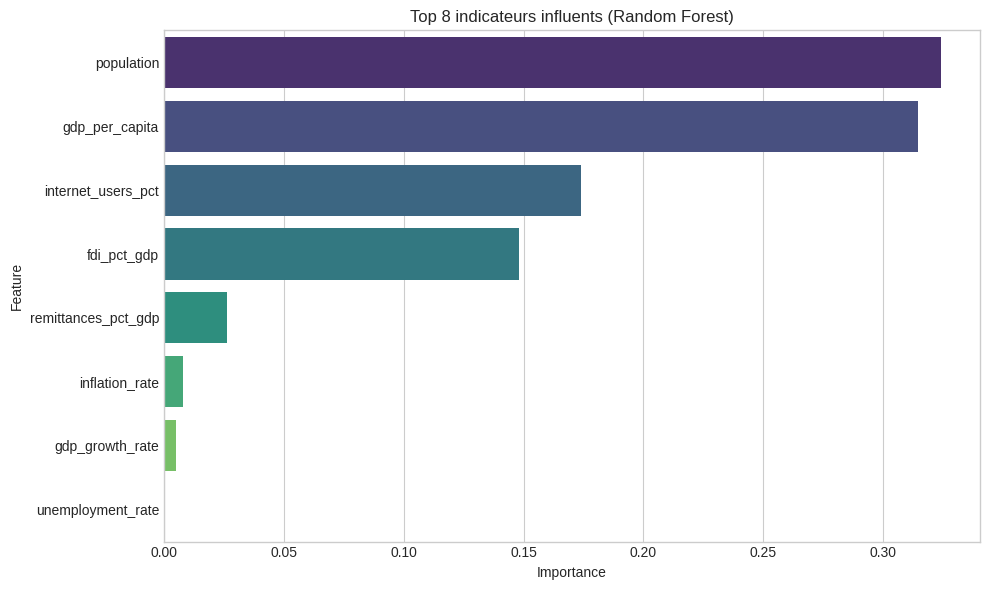

In [94]:
importances = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importances.head(8), x='Importance', y='Feature', palette='viridis')
plt.title("Top 8 indicateurs influents (Random Forest)")
plt.tight_layout()
plt.show()

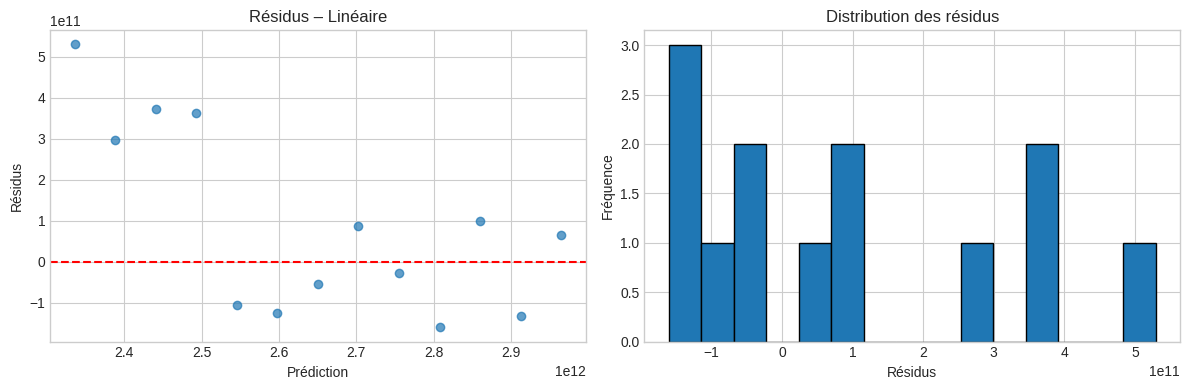

In [95]:
best_model_row = results.loc[results['R² (test)'].idxmax()]
best_model_name = best_model_row['Modèle']
if "Random Forest" in best_model_name:
    best_pred = y_pred_rf
elif "Linéaire" in best_model_name:
    best_pred = y_pred_test_lin
elif "Polynomial" in best_model_name:
    best_pred = y_pred_test_poly
else:
    best_pred = y_pred_test_exp

residuals = y_test - best_pred
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(best_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Prédiction")
plt.ylabel("Résidus")
plt.title(f"Résidus – {best_model_name}")

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=15, edgecolor='black')
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.title("Distribution des résidus")
plt.tight_layout()
plt.show()


In [96]:
print(f"\n=== CONCLUSION ===")
print(f"→ Le modèle le plus performant est : {best_model_name} (R² = {best_model_row['R² (test)']:.4f})")

if "Exponentiel" in best_model_name:
    print("→ Le modèle exponentiel confirme une croissance du PIB à taux constant,")
    print("  cohérente avec une accumulation de capital ou des gains de productivité.")
elif "Random Forest" in best_model_name:
    top_feature = importances.iloc[0]['Feature'].replace('_', ' ')
    print("→ Le modèle multivarié (Random Forest) surpasse les modèles univariés,")
    print("  ce qui démontre que le PIB dépend de facteurs conjoncturels (chômage, FDI, etc.).")
    print(f"→ L’indicateur le plus influent est : {top_feature}.")
else:
    print("→ Le modèle polynomial ou linéaire est préféré, probablement en raison")
    print("  des ruptures de tendance (crises économiques) sur la période.")


=== CONCLUSION ===
→ Le modèle le plus performant est : Linéaire (R² = -1.0048)
→ Le modèle polynomial ou linéaire est préféré, probablement en raison
  des ruptures de tendance (crises économiques) sur la période.
